In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
FPATH = r"C:\Users\allen\Code (Local)\EDET80k_Damage\Lasing Analysis\data\laser power profile 10.8V.csv"
data = pd.read_csv(FPATH)

in_power = data["current"] * data["voltage"]

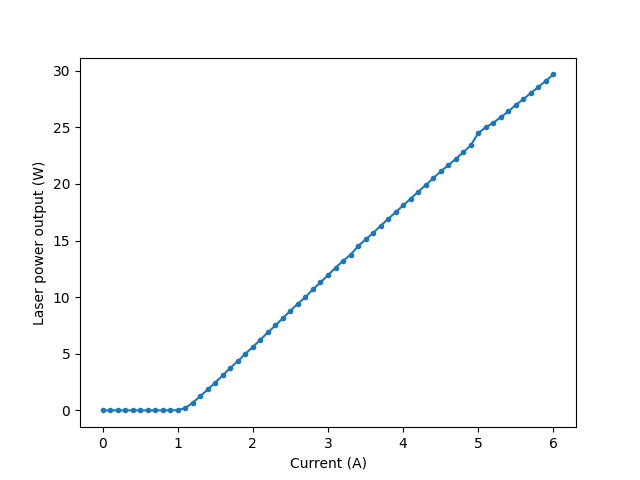

In [3]:
fig, ax = plt.subplots()
ax.plot(data["current"], data["laserpower"], marker=".", markersize=6)
ax.set_xlabel("Current (A)")
ax.set_ylabel("Laser power output (W)")
plt.show()


In [4]:
def lase(I, a, b, c):
    # cutoff_mask = I < a
    # I[cutoff_mask] = 0
    # I[~cutoff_mask] = I[~cutoff_mask] * m + b
    return a * I**2  + b * I + c
    

In [5]:
from scipy.optimize import curve_fit

LASING_START = 1 # A

mask = data["current"] > LASING_START

x = data["current"][mask]
y = data["laserpower"][mask]

params, pcov = curve_fit(lase, x, y, p0=(1, 0, 1))

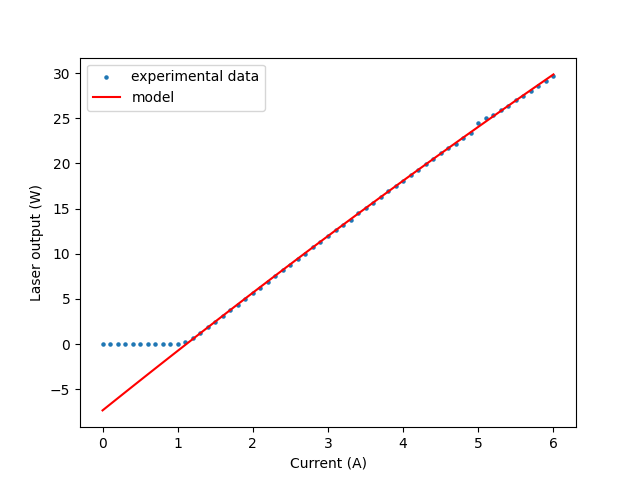

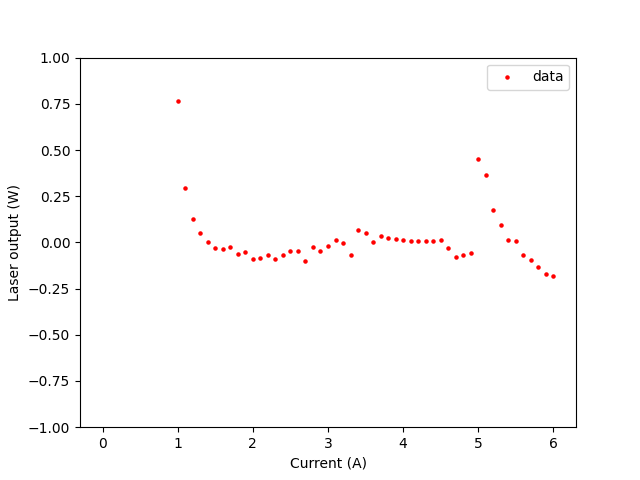

[-0.07902737  6.67298871 -7.34059295]


In [6]:
fig, ax = plt.subplots()

ax.scatter(data["current"], data["laserpower"], s=5, label="experimental data")
ax.plot(data["current"], lase(data["current"], *params), color="r", label="model")
ax.set_xlabel("Current (A)")
ax.set_ylabel("Laser output (W)")
ax.legend()

plt.show()

fig, ax = plt.subplots()

ax.scatter(data["current"], data["laserpower"] - lase(data["current"], *params), color="r", label="data", s=5)
ax.set_ylim(-1, 1)
ax.set_xlabel("Current (A)")
ax.set_ylabel("Laser output (W)")
ax.legend()
plt.show()
print(params)